# 3806ICT Assignment
Ken Quach - Yungpeng Huang - Kai Sato - Wui Theam Wong

# Maze Generator

In [1]:
import random
import math
import numpy as np
import sys

import collections
import matplotlib.pyplot as plt

import time
from math import sqrt

start_timer = time.time()

# Initial Variables, You can change these
gridx = 10
gridy = 10
obstaclepercent = 80

# amount of obstacles
obstacleamount = math.floor((((gridx * gridy) - 2) * (obstaclepercent/100)))

#symbols
symbolstart = 'S'
symbolend = 'G'
symbolopen = 'O'
symbolobstacle = 'H'

# print the grid
def printthegrid(thegrid):
    for i in range(0, gridy):
        for j in range(0, gridx):
            if (thegrid[i][j] == 'u'):
                print(str(thegrid[i][j]), end="   ")
            elif (thegrid[i][j] == 'c'):
                print(str(thegrid[i][j]), end="   ")
            else:
                print(str(thegrid[i][j]), end="   ")
        print('\n')

# return randomise coordinate
def randomcoord():
    return (random.randint(0, gridx-1), random.randint(0, gridy-1))

# euclidean_distance (for calculation the distance between the start and end)
def euclidean_distance(p1, p2):
    return sqrt((p1[0]-p2[0])**2+(p1[1]-p2[1])**2)

# Kruskal: Get the frontiers
def get_frontiers(current):
    frontiers_list = []
    # upper frontier
    if current[0] - 2 >= 0 and (current[0]-2, current[1]) not in visited_frontiers and thegrid[current[0]-2][current[1]]==symbolobstacle:
        frontiers_list.append((current[0]-2, current[1]))
    # lower frontier
    if current[0] + 2 <= gridx-1 and (current[0]+2, current[1]) not in visited_frontiers and thegrid[current[0]+2][current[1]]==symbolobstacle:
        frontiers_list.append((current[0]+2, current[1]))
    # left frontier
    if current[1] - 2 >= 0 and (current[0], current[1] - 2) not in visited_frontiers and thegrid[current[0]][current[1] - 2]==symbolobstacle:
        frontiers_list.append((current[0], current[1] - 2))
    # right frontier
    if current[1] + 2 <= gridy-1 and (current[0], current[1] + 2) not in visited_frontiers and thegrid[current[0]][current[1] + 2]==symbolobstacle:
        frontiers_list.append((current[0], current[1] + 2))
    return frontiers_list

# Kruskal: Get the neighbour
def get_neighbours(frontier):
    neighbours_list = []
    # upper neighbour
    if (frontier[0]-2 >= 0) and (thegrid[frontier[0]-2][frontier[1]] == symbolopen):
        neighbours_list.append((frontier[0]-2, frontier[1]))
    # lower neighbour
    if (frontier[0]+2 <= gridx-1) and (thegrid[frontier[0]+2][frontier[1]] == symbolopen):
        neighbours_list.append((frontier[0]+2, frontier[1]))
    # left neighbour
    if (frontier[1]-2 >= 0) and (thegrid[frontier[0]][frontier[1]-2] == symbolopen):
        neighbours_list.append((frontier[0], frontier[1]-2))
    # right neighbour
    if (frontier[1]+2 <= gridy-1) and (thegrid[frontier[0]][frontier[1]+2] == symbolopen):
        neighbours_list.append((frontier[0], frontier[1]+2))
    return neighbours_list

# Kruskal: Connect the neighbours
def connect(f, n):
    inbetween = ()
    if f[0] == n[0]:
        inbetween = (f[0], min(f[1], n[1])+1)
        
    if f[1] == n[1]:
        inbetween = (min(f[0], n[0])+1, f[1])
        
    thegrid[inbetween[0]][inbetween[1]] = symbolopen
    thegrid[f[0]][f[1]] = symbolopen

# start and end location
start = randomcoord()
end = randomcoord()

# if the start and end location are the same
while start == end or euclidean_distance(start, end) < min(gridx, gridy)/2:
    end = randomcoord()

# solution path
solutionpath = list(tuple())

# if the goal is near the solution
flag = False
if start[0] == end[0]:
    if end[1] > 0:
        if start[1] == (end[1] + 1):
            flag = True
    if end[1] < gridy:
        if start[1] == (end[1] - 1):
            flag = True
if start[1] == end[1]: 
    if end[0] > 0:
        if start[0] == (end[0] + 1):
            flag = True
    if end[0] < gridx:
        if start[0] == (end[0] - 1):
            flag = True
            

# finds a solution path. simple rightangled approach
if flag == False:
    if start[0] < end[0]:
        for x in range(start[0]+1,end[0]+1):
            solutionpath.append((x,start[1]))
    else:
        for x in range(start[0]-1,end[0]-1,-1):
            solutionpath.append((x,start[1]))
    if abs(start[1] - end[1]) >= 1:
        if start[1] < end[1]: 
            for y in range(start[1],end[1]-1):
                solutionpath.append((end[0],y+1))
        else:
            for y in range(start[1],end[1]+1,-1):
                solutionpath.append((end[0],y-1))
                
    else:
        solutionpath = solutionpath[:-1]
            
    
# defining the grid 
thegrid = [[symbolopen]*gridy for i in range(gridx)]    
    
###################################
##################               Kruskal
#######


if gridx <= 100 or gridy <= 100:
    print("\nUsing Kruskal Generator \n")
    
    # place walls over the grid
    thegrid = [[symbolobstacle]*gridy for i in range(gridx)]    

    starting_height = int(random.random()*gridx)
    starting_width = int(random.random()*gridy)
    
    thegrid[starting_height][starting_width] = symbolopen
    frontiers = []
    visited_frontiers = []
    frontiers = frontiers + get_frontiers((starting_height, starting_width)) 
    
    
    while(frontiers):
        frontier = frontiers[int(random.random()*len(frontiers))-1]
    #     frontier = (2, 1) # delete this
        neighbours = []
        neighbours = neighbours + get_neighbours(frontier)
        neighbour = ()

        if len(neighbours) > 0:
            neighbour = neighbours[int(random.random()*len(neighbours))-1]
    #     neighbour = (2, 3)
            connect(frontier, neighbour)

        frontiers = frontiers + get_frontiers((frontier[0], frontier[1]))
        visited_frontiers.append(frontier)
        frontiers.remove(frontier)
    

###################################
##################               Randomized
#######

# use randomised generator if grid too big
elif gridx > 100 or gridy > 100:
    print("\nUsing Randomised Generator\n")
    # defining a list of possible obstacles
    obstaclearray = []
    for coord_x in range(0, gridx):
        for coord_y in range(0, gridy):
            if thegrid[coord_x][coord_y] == symbolopen:
                obstaclearray.append((coord_x,coord_y))

    while obstacleamount > 0: 
        choice = np.random.randint(0,len(obstaclearray))
        thegrid[obstaclearray[choice][0]][obstaclearray[choice][1]] = symbolobstacle
        obstaclearray.pop(choice)
        obstacleamount -= 1

    for coord in solutionpath:
        thegrid[coord[0]][coord[1]] = symbolopen             
        
    
# prints grid    

# adding the start/end
thegrid[start[0]][start[1]] = symbolstart
thegrid[end[0]][end[1]] = symbolend

# defining solution path for visualisation
for coord in solutionpath:
    thegrid[coord[0]][coord[1]] = '*'

# print the maze 
if gridx < 100 and gridy < 100:
    printthegrid(thegrid)

# defining solution path to save to file txt
for coord in solutionpath:
    thegrid[coord[0]][coord[1]] = symbolopen
    
# make the start to be symbol opened (due to the code provided in week 10)
thegrid[start[0]][start[1]] = symbolopen
    
print("Start: ", start)
print("End: ", end)

# end timing
end = time.time()
print("Time taken to generate maze: ", end - start_timer)




Using Kruskal Generator 

H   O   H   O   O   O   O   O   O   O   

H   O   H   O   H   O   H   O   H   O   

H   O   O   O   H   O   O   O   O   O   

S   O   H   O   H   O   H   O   H   O   

*   O   H   O   O   O   O   O   O   O   

*   O   H   O   H   H   H   O   H   O   

*   *   *   *   *   *   *   *   G   O   

H   O   H   O   H   O   H   O   H   H   

H   O   O   O   O   O   O   O   O   O   

H   H   H   H   H   H   H   H   H   H   

Start:  (3, 0)
End:  (6, 8)
Time taken to generate maze:  0.020802736282348633


### Export to txt file (for Python)

In [2]:
file1 = open("grid.txt","w")
for y in range(0, gridx):
    file1.write(''.join(thegrid[y])+"\n")
file1.close()
print("Successfully export maze to grid.txt")

Successfully export maze to grid.txt


### Export to csp file (for PAT)

In [3]:
import csv
index = []
infinity = math.inf
for item in thegrid:
    try:
        temp_ind = [i for i, x in enumerate(item) if x == symbolobstacle]
        index.append(temp_ind)
        # could try np.where if list comprehensive is not efficient enough
    except ValueError:
        index.append(infinity)
        pass
# might use np array for better
with open("grid.txt", 'w') as fp:
    for item in thegrid:
        fp.write("".join(item) + "\n")
# for i in range(len(index)):

pat_dimension_M = "#define M " + str(gridx)
pat_dimension_N = "#define N " + str(gridy)
layout_start = "var board[N][M] = ["
# new line array here
layout_end = "];"

with open("grid.csp", "w") as f:
    f.write(pat_dimension_M + "\n")
    f.write(pat_dimension_N + "\n")
    f.write(layout_start + "\n")
    csv.writer(f, delimiter=",").writerows(thegrid)
    f.write(layout_end)
print("Successfully export maze to grid.csp")

Successfully export maze to grid.csp


# Reinforcement Learning

## Grid World

In [4]:
# maze example

class GridWorld:
    """ Grid World environment
            there are four actions (left, right, up, and down) to move an agent
            In a grid, if it reaches a goal, it get 30 points of reward.
            If it falls in a hole or moves out of the grid world, it gets -5.
            Each step costs -1 point. 

        to test GridWorld, run the following sample codes:

            env = GridWorld('grid.txt')

            env.print_map()
            print [2,3], env.check_state([2,3])
            print [0,0], env.check_state([0,0])
            print [3,4], env.check_state([3,4])
            print [10,3], env.check_state([10,3])

            env.init([0,0])
            print env.next(1)  # right
            print env.next(3)  # down
            print env.next(0)  # left
            print env.next(2)  # up
            print env.next(2)  # up

        Parameters
        ==========
        _map        ndarray
                    string array read from a file input
        _size       1d array
                    the size of _map in ndarray
        goal_pos    tuple
                    the index for the goal location
        _actions    list
                    list of actions for 4 actions
        _s          1d array
                    current state
    """
    def __init__(self, fn):
        # read a map from a file
        self._map = self.read_map(fn)
        self._size = np.asarray(self._map.shape)
        self.goal_pos = np.where(self._map == 'G')

        # definition of actions (left, right, up, and down repectively)
        self._actions = [[0, -1], [0, 1], [-1, 0], [1, 0]]
        self._s = None

    def get_cur_state(self):
        return self._s

    def get_size(self):
        return self._size

    def read_map(self, fn):
        grid = []
        with open(fn) as f:
            for line in f:
               grid.append(list(line.strip()))
        return np.asarray(grid)

    def print_map(self):
        print( self._map )

    def check_state(self, s):
        if isinstance(s, collections.Iterable) and len(s) == 2:
            if s[0] < 0 or s[1] < 0 or\
               s[0] >= self._size[0] or s[1] >= self._size[1]:
               return 'N'
            return self._map[tuple(s)].upper()
        else:
            return 'F'  # wrong input

    def init(self, state=None):
        if state is None:
            s = [0, 0]
        else:
            s = state

        if self.check_state(s) == 'O':
            self._s = np.asarray(state)
        else:
            raise ValueError("Invalid state for init")

    def next(self, a):
        s1 = self._s + self._actions[a]
        # state transition
        curr = self.check_state(s1)
        
        if curr == 'H' or curr == 'N':
            return -5
        elif curr == 'F':
            warnings.warn("invalid state " + str(s1))
            return -5
        elif curr == 'G':
            self._s = s1
            return 30
        else:
            self._s = s1
            return -1
        
    def is_goal(self):
        return self.check_state(self._s) == 'G'
            
    def get_actions(self):
        return self._actions

In [5]:
env = GridWorld("grid.txt")
env.print_map()

[['H' 'O' 'H' 'O' 'O' 'O' 'O' 'O' 'O' 'O']
 ['H' 'O' 'H' 'O' 'H' 'O' 'H' 'O' 'H' 'O']
 ['H' 'O' 'O' 'O' 'H' 'O' 'O' 'O' 'O' 'O']
 ['O' 'O' 'H' 'O' 'H' 'O' 'H' 'O' 'H' 'O']
 ['O' 'O' 'H' 'O' 'O' 'O' 'O' 'O' 'O' 'O']
 ['O' 'O' 'H' 'O' 'H' 'H' 'H' 'O' 'H' 'O']
 ['O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'G' 'O']
 ['H' 'O' 'H' 'O' 'H' 'O' 'H' 'O' 'H' 'H']
 ['H' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O']
 ['H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H']]


In [6]:
# top-left to (0,0)
def coord_convert(s, sz):
    return [s[1], sz[0]-s[0]-1]

## RL Agent

In [7]:
class RLAgent: 
    """
        Reinforcement Learning Agent Model for training/testing
        with Tabular function approximation
        
    """
    
    def __init__(self, env):
        self.env = env
        self.size = env.get_size()
        self.n_a = len(env.get_actions())
        # self.Q table including the surrounding border
        self.Q = np.zeros((self.size[0], self.size[1], self.n_a))
        
    def greedy(self, s):
        return np.argmax(self.Q[s[0], s[1]])

    def epsilon_greed(self, e,s):
        if np.random.rand() < e:
            return np.random.randint(self.n_a)
        else:
            return self.greedy(s)
    
    def train(self, start, **params):
        
        # parameters
        gamma = params.pop('gamma', 0.99)
        alpha = params.pop('alpha', 0.1)
        epsilon= params.pop('epsilon', 0.1)
        maxiter= params.pop('maxiter', 1000) 
        maxstep= params.pop('maxstep', 1000)
        
        # init self.Q matrix
        self.Q[...] = 0
        self.Q[self.env._map == 'H'] = -np.inf
        
        # online train
        # rewards and step trace
        rtrace = []
        steps = []
        for j in range(maxiter):

            self.env.init(start)
            s = self.env.get_cur_state()
            # selection an action
            a = self.epsilon_greed(epsilon, s)

            rewards = []
            trace = np.array(coord_convert(s, self.size))
            # run simulation for max number of steps 
            for step in range(maxstep):
                # move
                r = self.env.next(a)
                s1 = self.env.get_cur_state()
                a1 = self.epsilon_greed(epsilon, s1)

                rewards.append(r)
                trace = np.vstack((trace, coord_convert(s1, self.size)))
            
                # update self.Q table 
                self.Q[s[0],s[1],a] += alpha*(r + gamma * np.max(self.Q[s1[0],s1[1],:]) - self.Q[s[0],s[1],a])
                
                if self.env.is_goal(): # reached the goal
                    self.Q[s1[0], s1[1], a1] = 0
                    break

                s = s1
                a = a1

            rtrace.append(np.sum(rewards))
            steps.append(step+1)
        return rtrace, steps, trace # last trace of trajectory

    def test(self, start, maxstep=1000):
        env.init(start)
        s = env.get_cur_state()
        a = np.argmax(self.Q[s[0], s[1], :])
        trace = np.array(coord_convert(s, self.size))
        for step in range(maxstep):
            env.next(a)
            s1 = env.get_cur_state()
            a1 = np.argmax(self.Q[s1[0], s1[1],:])
            trace = np.vstack((trace, coord_convert(s1, self.size)))
            if env.is_goal():  # reached the goal
                break
            a = a1
        
        return trace

# Results

## Plotting tools

In [8]:
### Plotting tools 

def plot_trace(agent, start, trace, title="test trajectory"):
    plt.plot(trace[:, 0], trace[:, 1], "ko-")
    plt.text(env.goal_pos[1], agent.size[0]-env.goal_pos[0]-1, 'G')
    plt.text(start[1], agent.size[0]-start[0]-1, 'S')
    plt.xlim([0, agent.size[1]])
    plt.ylim([0, agent.size[0]])
    

def plot_train(agent, rtrace, steps, trace, start):

    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(221)
    plt.plot(rtrace)
    plt.ylabel("sum of rewards")

    ax1 = fig.add_subplot(222)
    plt.plot(steps)
    plt.ylabel("# steps")

    # contour plot for agent.Q
    ax2 = fig.add_subplot(223)
    xs = range(agent.size[1])
    ys = range(agent.size[0])
    maxQ = np.max(agent.Q, axis=2)
    h_b = (maxQ==-np.inf)
    maxQ[h_b] = 0
    maxQ[h_b] = np.min(maxQ) - 100
    cs = plt.contourf(xs, ys[::-1], maxQ)
    plt.colorbar(cs)
    plt.text(env.goal_pos[1], agent.size[0]-env.goal_pos[0]-1, 'G')
    plt.text(start[1], agent.size[0]-start[0]-1, 'S')
    plt.ylabel("max agent.Q")

    # plot traces
    ax3 = fig.add_subplot(224)
    plot_trace(agent, start, trace, "trace of the last episode")

    plt.plot()

### Training and Testing with GridWorld

In [9]:
# start timer for training
start_timer = time.time()

agent = RLAgent(env)
start = [start[0],start[1]]
rtrace, steps, trace = agent.train(start, 
                                   gamma=0.99, 
                                   alpha=0.1, 
                                   epsilon=0.1, 
                                   maxiter=100, 
                                   maxstep=1000)

test_trace = agent.test(start)

# end timer for training
end = time.time()
print("Total computation time (training + testing): ", end - start_timer)


/Users/lunary/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:67: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working


Total computation time (training + testing):  0.2229609489440918


### Visualisation of the result for training and testing

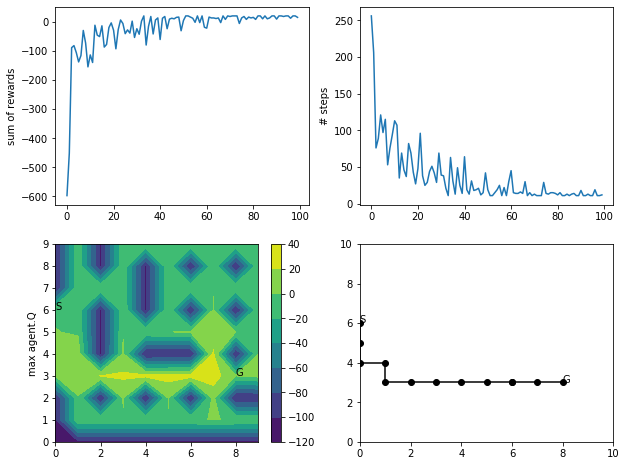

In [10]:
plot_train(agent, rtrace, steps, trace, start)

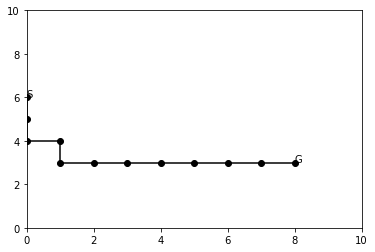

In [11]:
plot_trace(agent, start, test_trace)